In [44]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("./deeplearning.mplstyle")

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [46]:
from sklearn.datasets import make_blobs
from lab_utils_multiclass_TF import *

In [47]:
# make 4-class dataset for classification
classes = 4
m = 100
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
std = 1.0
X_train, y_train = make_blobs(
    n_samples=m, centers=centers, cluster_std=std, random_state=30)

In [48]:
print(f"X_train size: {X_train.shape}")
print(f"y_train size: {y_train.shape}")

X_train size: (100, 2)
y_train size: (100,)


/home/morteza/dev/Machine-Learning-Specialization/C2/W2/lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  idx = np.where(y == i)


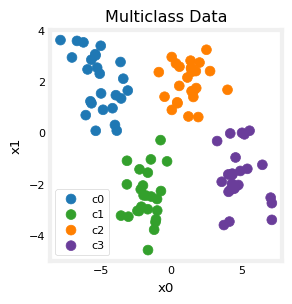

In [49]:
plt_mc(X_train, y_train, classes, centers, std=std)

In [50]:
# show classes in data set
print(f"unique classes {np.unique(y_train)}")
# show how classes are represented
print(f"class representation {y_train[:10]}")
# show shapes of our dataset
print(f"shape of X_train: {X_train.shape}, shape of y_train: {y_train.shape}")

unique classes [0 1 2 3]
class representation [3 3 3 0 3 3 3 3 2 0]
shape of X_train: (100, 2), shape of y_train: (100,)


## model

In [51]:
tf.random.set_seed(1234)  # applied to achieve consistent results
model = Sequential(
    [
        Dense(units=2, activation="relu", name="L1"),
        Dense(units=4, activation="linear", name="L2")
    ]
)

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)
              )
model.fit(X_train, y_train, epochs=200)

Epoch 1/200
4/4 [==============================] - 0s 3ms/step - loss: 1.2971
Epoch 2/200
4/4 [==============================] - 0s 2ms/step - loss: 1.2026
Epoch 3/200
4/4 [==============================] - 0s 3ms/step - loss: 1.1194
Epoch 4/200
4/4 [==============================] - 0s 4ms/step - loss: 1.0566
Epoch 5/200
4/4 [==============================] - 0s 3ms/step - loss: 0.9950
Epoch 6/200
4/4 [==============================] - 0s 3ms/step - loss: 0.9450
Epoch 7/200
4/4 [==============================] - 0s 4ms/step - loss: 0.9006
Epoch 8/200
4/4 [==============================] - 0s 3ms/step - loss: 0.8556
Epoch 9/200
4/4 [==============================] - 0s 3ms/step - loss: 0.8161
Epoch 10/200
4/4 [==============================] - 0s 4ms/step - loss: 0.7792
Epoch 11/200
4/4 [==============================] - 0s 3ms/step - loss: 0.7449
Epoch 12/200
4/4 [==============================] - 0s 4ms/step - loss: 0.7144
Epoch 13/200
4/4 [==============================] - 0s 3ms/st

In [52]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 2)                 6         
                                                                 
 L2 (Dense)                  (None, 4)                 12        
                                                                 
Total params: 18 (72.00 Byte)
Trainable params: 18 (72.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


184/184 [==============================] - 0s 955us/step


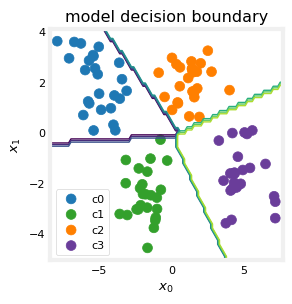

In [53]:
plt_cat_mc(X_train, y_train, model, classes)

In [54]:
# gather the trained parameters from the first layer
l1 = model.get_layer("L1")
W1, b1 = l1.get_weights()
print("W1", W1)
print("b1", b1)

W1 [[-1.64 -0.63]
 [-1.23  2.33]]
b1 [1.55 1.27]


In [60]:
x0 = np.arange(-8, 8, 0.1)

# wx+b = 0
# x1 = -(w0*x0+b)/w1

x1 = -x0[:, np.newaxis] * (W1[:, 1] / W1[:, 0]) - b1/W1[:, 0]
print("x1 size", x1.shape)

x1 size (160, 2)


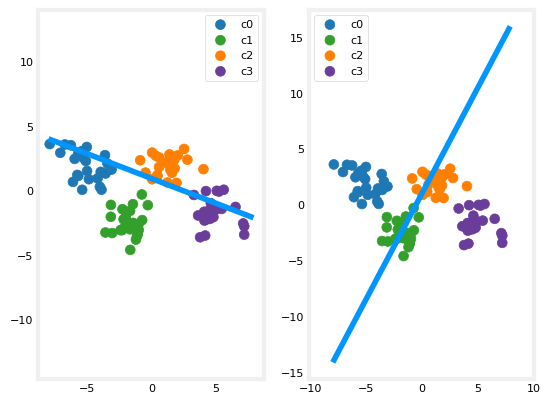

In [61]:
fig, axs = plt.subplots(1, 2)

for i, ax in enumerate(axs):
    plt_mc_data(ax, X_train, y_train, classes, map=dkcolors_map,
                legend=True, size=50, equal_xy=False)
    ax.plot(x0, x1[:, i])

    ax.axis("equal")

184/184 [==============================] - 0s 1ms/step


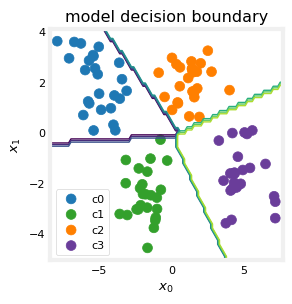

In [57]:
plt_cat_mc(X_train, y_train, model, classes)